In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Wrangling

In [5]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
X_train = train_df.drop('label', axis = 1).to_numpy()
y_train = train_df.label.to_numpy()
X_test = test_df.to_numpy()
y_test = []

In [7]:
num_images_train = len(X_train)
num_images_test = len(X_test)
# convert train dataset into (length, width, channels)
length, width, channels = 28, 28, 1
X_train = X_train.reshape(num_images_train, length, width, channels)
X_test = X_test.reshape(num_images_test, length, width, channels)

# one hot encoding
y_train = to_categorical(y_train)


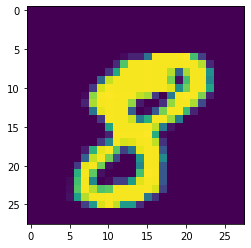

In [8]:
plt.imshow(X_train[10])

# Data Augumentation

In [9]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
    return data_augmentation

In [10]:
data_augmentation = data_augmenter()

# Building the Model

In [11]:
def my_model():
    model = tf.keras.Sequential([])
    model.add(tf.keras.layers.ZeroPadding2D(input_shape=(length,width,channels),padding=(3, 3), data_format=None)),
    model.add(tf.keras.layers.Conv2D(32,(7,7), strides = (1,1))),
    model.add(tf.keras.layers.BatchNormalization(axis = 3)),
    model.add(tf.keras.layers.ReLU( max_value=None, negative_slope=0, threshold=0)),
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)),
    model.add(tf.keras.layers.Flatten(data_format = None)),
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    
    return model

In [12]:
model = my_model()

In [13]:
# compiling my model
model.compile(optimizer = keras.optimizers.Adam(
   learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False
), loss = 'binary_crossentropy',metrics = ['accuracy'])

# checking the parameters of my model

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

# Training my model

In [15]:
model.fit(X_train, y_train, epochs = 10, batch_size = 16)

Epoch 1/10
2625/2625 [==============================] - 104s 40ms/step - loss: 0.0268 - accuracy: 0.9544
Epoch 2/10
2625/2625 [==============================] - 101s 38ms/step - loss: 0.0136 - accuracy: 0.9766
Epoch 3/10
2625/2625 [==============================] - 103s 39ms/step - loss: 0.0102 - accuracy: 0.9821
Epoch 4/10
2625/2625 [==============================] - 101s 38ms/step - loss: 0.0083 - accuracy: 0.9861s - loss: 0.0083 
Epoch 5/10
2625/2625 [==============================] - 103s 39ms/step - loss: 0.0069 - accuracy: 0.9883
Epoch 6/10
2625/2625 [==============================] - 101s 38ms/step - loss: 0.0058 - accuracy: 0.9906
Epoch 7/10
2625/2625 [==============================] - 102s 39ms/step - loss: 0.0050 - accuracy: 0.9913s - loss: 0.0050 - accuracy
Epoch 8/10
2625/2625 [==============================] - 106s 41ms/step - loss: 0.0043 - accuracy: 0.9927
Epoch 9/10
2625/2625 [==============================] - 102s 39ms/step - loss: 0.0036 - accuracy: 0.9937
Epoch 10/10

In [16]:
model.history

# Predictions

In [17]:
predictions =  np.argmax(model.predict(X_test), axis=-1)
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)